In [31]:
import numpy as np
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import matplotlib.pyplot as plt

In [7]:
mobile_net = tf.keras.applications.MobileNetV2()

14540800/14536120 [==============================] - 2s 0us/step


In [8]:
print(mobile_net.summary())

][0]          
__________________________________________________________________________________________________
block_6_depthwise_relu (ReLU)   (None, 14, 14, 192)  0           block_6_depthwise_BN[0][0]       
__________________________________________________________________________________________________
block_6_project (Conv2D)        (None, 14, 14, 64)   12288       block_6_depthwise_relu[0][0]     
__________________________________________________________________________________________________
block_6_project_BN (BatchNormal (None, 14, 14, 64)   256         block_6_project[0][0]            
__________________________________________________________________________________________________
block_7_expand (Conv2D)         (None, 14, 14, 384)  24576       block_6_project_BN[0][0]         
__________________________________________________________________________________________________
block_7_expand_BN (BatchNormali (None, 14, 14, 384)  1536        block_7_expand[0][0]         

In [38]:
def image_preprocessing(path):
    img= tf.keras.preprocessing.image.load_img(path, target_size=(224,224))
    img_array = keras.preprocessing.image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

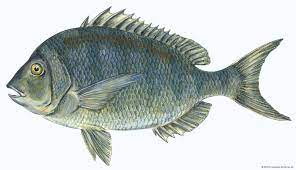

In [44]:
Image('fish.jpeg')

In [45]:
preprocessed_img = image_preprocessing('fish.jpeg')
predections = mobile_net.predict(preprocessed_img)
results = tf.keras.applications.imagenet_utils.decode_predictions(predections)
results

[[('n01667778', 'terrapin', 0.10354499),
  ('n01704323', 'triceratops', 0.062187072),
  ('n01622779', 'great_grey_owl', 0.041535135),
  ('n02123045', 'tabby', 0.01697239),
  ('n01608432', 'kite', 0.01547657)]]

Terrapin is a kind of Aquatic Animal

Let's try on another image


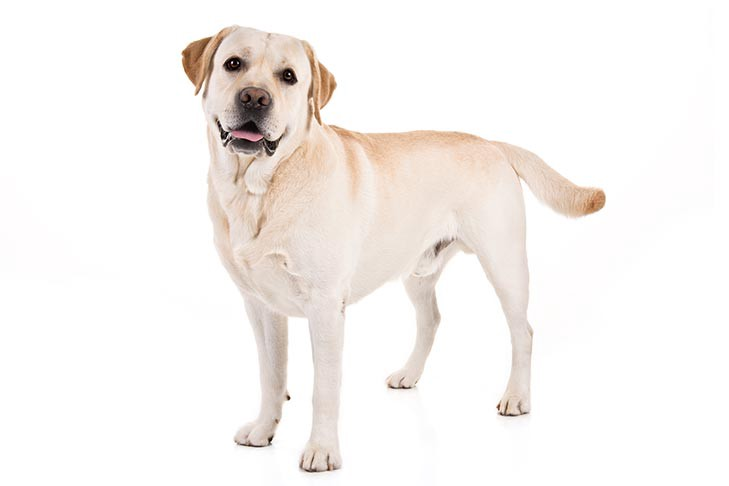

In [46]:
Image('dog.jpeg')

In [47]:
preprocessed_img = image_preprocessing('dog.jpeg')
predections = mobile_net.predict(preprocessed_img)
results = tf.keras.applications.imagenet_utils.decode_predictions(predections)
results

[[('n02099712', 'Labrador_retriever', 0.625153),
  ('n02109047', 'Great_Dane', 0.035349116),
  ('n02087394', 'Rhodesian_ridgeback', 0.014680599),
  ('n02089973', 'English_foxhound', 0.012637768),
  ('n02089867', 'Walker_hound', 0.011392001)]]

Ysssss!!!! It's a Labrador

Accruracy seems pretty great lets try on more images

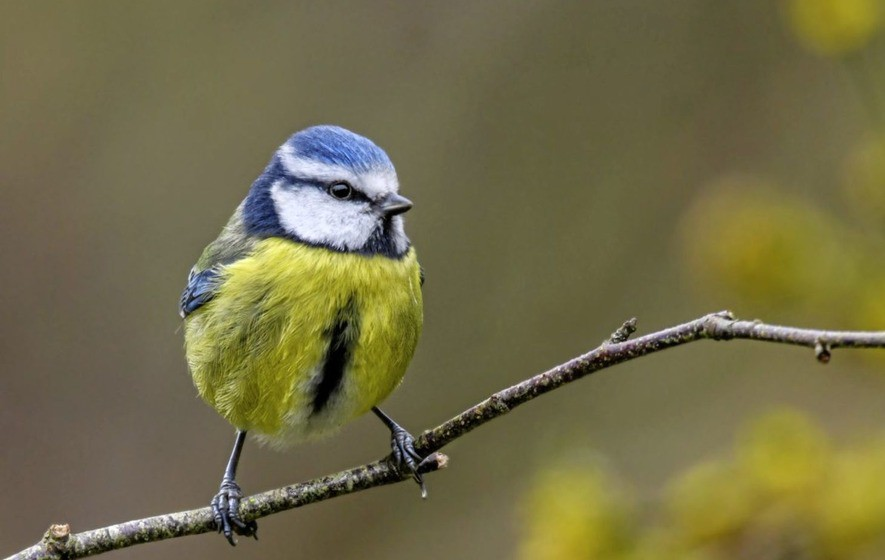

In [49]:
Image('bird.jpeg')

In [50]:
preprocessed_img = image_preprocessing('bird.jpeg')
predections = mobile_net.predict(preprocessed_img)
results = tf.keras.applications.imagenet_utils.decode_predictions(predections)
results

[[('n01531178', 'goldfinch', 0.28887737),
  ('n01592084', 'chickadee', 0.09123745),
  ('n01828970', 'bee_eater', 0.041228455),
  ('n01580077', 'jay', 0.03689185),
  ('n01560419', 'bulbul', 0.012594199)]]

Goldfinch is a Species of europen bird

As the accuracy of the model seems pretty amazing!!